In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")

# Initial data exploration

In [2]:
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [3]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

# Data cleaning and normalization of column values

In [4]:
# Remove row with null values
print(star_wars.shape)
star_wars = star_wars[star_wars['RespondentID'].notnull()]
print(star_wars.shape)

(1187, 38)
(1186, 38)


In [5]:
yes_no = {"Yes": True, "No": False}

star_wars['Have you seen any of the 6 films in the Star Wars franchise?'] = star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].map(yes_no)
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] = star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].map(yes_no)

In [6]:
# Rename each of the seen columns so the names are more intuitive.
star_wars.rename(columns={'Which of the following Star Wars films have you seen? Please select all that apply.': 'seen_1',
'Unnamed: 4':'seen_2',
'Unnamed: 5':'seen_3',
'Unnamed: 6':'seen_4',
'Unnamed: 7':'seen_5',
'Unnamed: 8':'seen_6',
}, inplace=True)

In [7]:
# Convert each of the seen columns so that it only contains the values True and False.
seen_cols = ['seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6']

seen_yes_no = {'Star Wars: Episode I  The Phantom Menace':True,
'Star Wars: Episode II  Attack of the Clones':True,
'Star Wars: Episode III  Revenge of the Sith':True,
'Star Wars: Episode IV  A New Hope':True,
'Star Wars: Episode V The Empire Strikes Back':True,
'Star Wars: Episode VI Return of the Jedi':True,
np.NaN: False}

for col in seen_cols:
    star_wars[col] = star_wars[col].map(seen_yes_no)

In [8]:
# Convert each of the ranking columns to a float type.
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

In [9]:
# Give each column a more descriptive name.
star_wars.rename(columns={'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.': 'ranking_1',
'Unnamed: 10':'ranking_2',
'Unnamed: 11':'ranking_3',
'Unnamed: 12':'ranking_4',
'Unnamed: 13':'ranking_5',
'Unnamed: 14':'ranking_6',
}, inplace=True)

In [10]:
ep_abbrev = ['Ep.I', 'Ep.II', 'Ep.III', 'Ep.IV', 'Ep.V','Ep.VI']

# Analyze average movie rankings

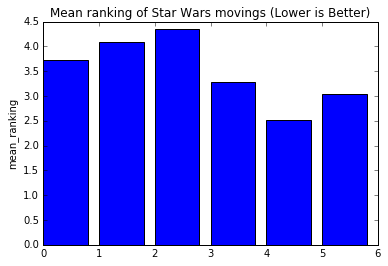

In [11]:
plt.bar(range(6), star_wars[star_wars.columns[9:15]].mean())
plt.ylabel('mean_ranking')
plt.title('Mean ranking of Star Wars movings (Lower is Better)')

### Observations
The original trilogy has a better average ranking then the prequel trilogy.

The average ranking of Star Wars movies from most favorite to least favorite is:
1. Episode V: The Empire Strikes Back
2. Episode VI: Return of the Jedi
3. Episode IV: A New Hope
4. Episode I: The Phantom Menace
5. Episode II: Attack of the Clones
6. Episode III: Revenge of the Sith

# Analyze movie viewers

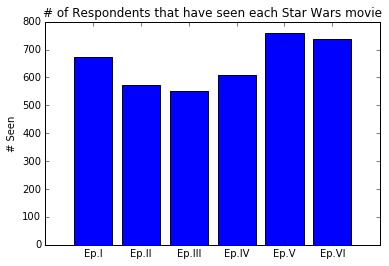

In [12]:
plt.bar(range(6), star_wars[star_wars.columns[3:9]].sum(), align='center')
plt.ylabel('# Seen')
plt.xticks(range(6), ep_abbrev)
plt.title('# of Respondents that have seen each Star Wars movie')

### Observations
More respondents have seen the original trilogy than the prequel trilogy.

The Star Wars movies from most viewed to least viewed is:
1. Episode V: The Empire Strikes Back
2. Episode VI: Return of the Jedi
3. Episode I: The Phantom Menace
4. Episode IV: A New Hope
5. Episode II: Attack of the Clones
6. Episode III: Revenge of the Sith

# Analyze by segment

In [13]:
# Split the data into two groups based on binary column
males = star_wars[star_wars["Gender"] == "Male"]
females = star_wars[star_wars["Gender"] == "Female"]

## Segment: Analyze average movie rankings

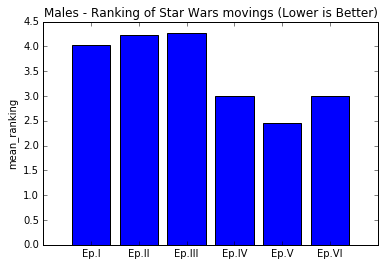

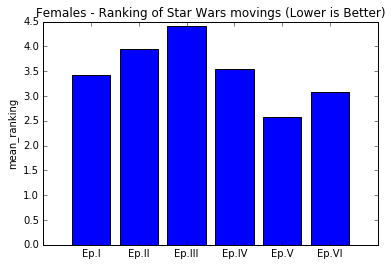

In [20]:
plt.bar(range(6), males[males.columns[9:15]].mean(), align='center')
plt.ylabel('mean_ranking')
plt.xticks(range(6), ep_abbrev)
plt.title('Males - Ranking of Star Wars movings (Lower is Better)')
plt.show()

plt.bar(range(6), females[females.columns[9:15]].mean(), align='center')
plt.ylabel('mean_ranking')
plt.xticks(range(6), ep_abbrev)
plt.title('Females - Ranking of Star Wars movings (Lower is Better)')
plt.show()

## Segment: Analyze movie viewers

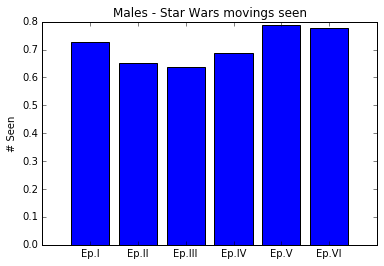

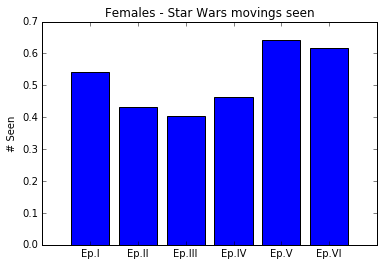

In [21]:
plt.bar(range(6), males[males.columns[3:9]].mean(), align='center')
plt.ylabel('# Seen')
plt.xticks(range(6), ep_abbrev)
plt.title('Males - Star Wars movings seen')
plt.show()

plt.bar(range(6), females[females.columns[3:9]].mean(), align='center')
plt.ylabel('# Seen')
plt.xticks(range(6), ep_abbrev)
plt.title('Females - Star Wars movings seen')
plt.show()